In [50]:
#import libraries and read csv. 

import cdsapi
from netCDF4 import Dataset
from netCDF4 import num2date
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
#Retrieve data with the CDS API and store as a netCDF4 file in the working directory.
# CMIP6 climate projections (https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=overview)

c = cdsapi.Client()

c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'date': '2022-04-10/2022-05-15',
        'temporal_resolution': 'daily',
        'experiment': 'ssp1_1_9',
        'level': 'single_levels',
        'variable': 'daily_maximum_near_surface_air_temperature',
        'model': 'ec_earth3',
        'area': [
            2, 38, 1,
            39,
        ],
    },
    'download.zip')

In [51]:
# Open netCDF4 file
f = netCDF4.Dataset('C:/Users/marsu/Downloads/tasmax_day_EC-Earth3_ssp119_r4i1p1f1_gr_20220410-20220515_v20200425.nc')
 
# Extract variable
temp = f.variables['tasmax']
 
# Get dimensions: time, latitude, longitude
time_dim, lat_dim, lon_dim = temp.get_dims()
time_var = f.variables[time_dim.name]
times = num2date(time_var[:], time_var.units)
latitudes = f.variables[lat_dim.name][:]
longitudes = f.variables[lon_dim.name][:]
 
output_dir = 'E:/María/GIS_DataManag_courses/Calculate_DegreeDays/'

In [53]:
#Write data as a csv table with 4 columns: time, latitude, longitude, temperature

filename = os.path.join(output_dir, 'table.csv')
print(f'Writing data in tabular form to {filename})
      
times_grid, latitudes_grid, longitudes_grid = [
    x.flatten() for x in np.meshgrid(times, latitudes, longitudes, indexing='ij')]
df = pd.DataFrame({
    'time': [t.isoformat() for t in times_grid],
    'latitude': latitudes_grid,
    'longitude': longitudes_grid,
    'temperature': temp[:].flatten()})  #to convert N dimensional array to 1D
df.to_csv(filename, index=False)
print('Done')

Writing data in tabular form to E:/María/GIS_DataManag_courses/Calculate_DegreeDays/table.csv (this may take some time)...
Done


In [2]:
#Parameters needed

#  1. Farmers plant their crops in on march 1st.
#  2. The adult insects will lay eggs on the new seedlings after they emerge, 10 days later.
#  3. It takes about 150 DD from FAW adults laying eggs, to the majority of the eggs hatching into larvae
#  4. It takes about 550 DD to complete a full lifecycle of the FAW  (Adult – Adult)
#  5. Upper Developmental Threshold --> 35.5ºC
#  6. Lower Developmental Threshold --> 12.7ºC

max_t = 35.5
min_t = 12.7

total = 0
DD_temp = []
    
for x in df.temp:
    total = total + x
    DD_temp.append(total)

In [ ]:
#Add plot where upper and lower temp limits are displayed, so that it's easier to understand how temperature accumulates.

In [4]:
#Identify DegreeDay at 150ºC and 550ºC

total1 = 0
final1 = 0
    
for i in df.temp:
    total1 = total1 + i
    if total1 <= 150:
        final1 = total1

total2 = 0
final2 = 0
    
for i in df.temp:
    total2 = total2 + i
    if total2 <= 550:
        final2 = total2

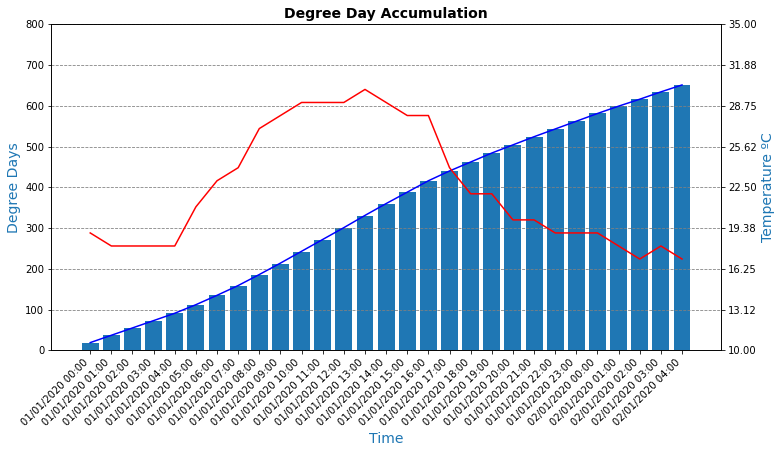

In [7]:
# Create plot to represent Degree Days

fig, ax = plt.subplots()
plt.bar(df['time'],df['DD_temp'])
plt.rcParams["figure.figsize"] = (12,6)

# Set up axis: 'x' and 'y'
x1 = plt.plot(DD_temp, color='blue', label='Degree Days')
plt.title('Degree Day Accumulation', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.xlabel("Time",fontdict = {'fontsize':14, 'color':'tab:blue'})
plt.ylabel("Degree Days", fontdict = {'fontsize':14, 'color':'tab:blue'})
plt.xticks(rotation = 45, ha='right', fontsize= 10)
plt.ylim([0,800])


# Adding a second x-axis ('Temperature ºC')
ax2 = ax.twinx()
x2 = plt.plot(df['temp'], color='red',label='Temperature')
plt.ylim([10, 35])
plt.ylabel("Temperature ºC", fontdict = {'fontsize':14, 'color':'tab:blue'})
plt.yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))

# Set up grid and legend
ax.grid(axis='y', color='gray', linestyle='dashed')

#leg = lns1 + lns2
#labs = [l.get_label() for l in leg]
#ax.legend(leg, labs, loc=0)

plt.show()


In [ ]:
#reducir decimales de 'temp' a 0
#○introducir varias localizaciones